In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rtas = pd.read_csv("Analisis-taller-de-soporte-informático-_respuestas_.csv",sep=",",engine="python")
del rtas["Marca temporal"]


## ¿Cuáles son las razones por las que el alumno considera que no ha entregado todos los trabajos?


- ¿Tendrá que ver con el lenguaje de programación?¿Cuántos odian python?

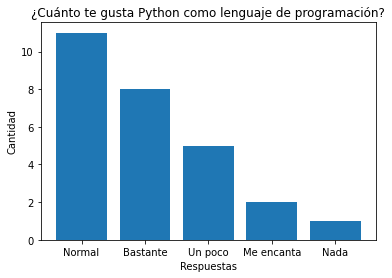

In [2]:
valoresX=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].unique()
valoresY=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].value_counts().tolist()

plt.bar(valoresX,valoresY)
plt.title('¿Cuánto te gusta Python como lenguaje de programación?')
plt.xlabel('Respuestas')
plt.ylabel('Cantidad')
plt.show()

##### Con este gráfco podemos ver que a la mayoria (17 de 27) de los alumnos que respondieron la encuesta se encuentran en el grupo de los que no les agrada ni les disgusta python, los que les gusta solo un poco o los que no les gusta nada.

##### Ahora veamos las demás respuestas de este grupo relacionadas con el análisis de datos y la realización de las tareas

[27.272727272727273, 40.0, 100.0]


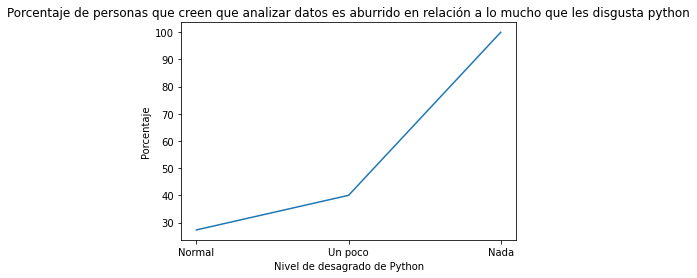

In [3]:
def calcularPorcentaje(totalidad,cantidad):
    return((cantidad*100)/totalidad)

pythonNormal=rtas[(rtas["¿Cuánto te gusta Python como lenguaje de programación?"]=="Normal")]
pythonPoco=rtas[(rtas["¿Cuánto te gusta Python como lenguaje de programación?"]=="Un poco")]
pythonNada=rtas[(rtas["¿Cuánto te gusta Python como lenguaje de programación?"]=="Nada")]

siNormal=pythonNormal["¿Considerás que analizar datos es aburrido?"].value_counts().tolist()
siPoco=pythonPoco["¿Considerás que analizar datos es aburrido?"].value_counts().tolist()
siNada=pythonNada["¿Considerás que analizar datos es aburrido?"].value_counts().tolist()

valoresX=["Normal","Un poco","Nada"]
listaSi=[calcularPorcentaje(len(pythonNormal),siNormal[1]),calcularPorcentaje(len(pythonPoco),siPoco[1]),calcularPorcentaje(len(pythonNada),siNada[0])]

print(listaSi)
plt.plot(valoresX,listaSi)
plt.title('Porcentaje de personas que creen que analizar datos es aburrido en relación a lo mucho que les disgusta python')
plt.xlabel('Nivel de desagrado de Python')
plt.ylabel('Porcentaje')
plt.show()

##### En este gráfico podemos apreciar que el porcentaje de alumnos que consideran que analizar datos con python es aburrido de cada grupo aumenta en relación a su nivel de disgusto por el lenguaje

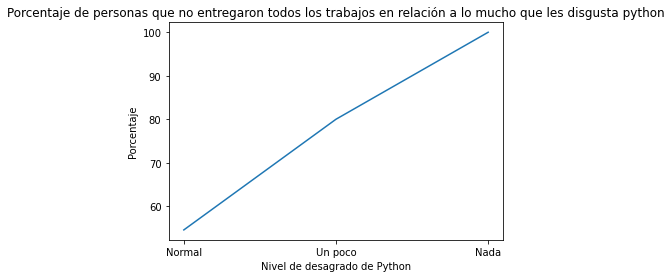

In [4]:
noEntregoNormal=pythonNormal[pythonNormal["¿Pudo entregar todos los trabajos de la materia?"]=="No"]
noEntregoPoco=pythonPoco[pythonPoco["¿Pudo entregar todos los trabajos de la materia?"]=="No"]
noEntregoNada=pythonNada[pythonNada["¿Pudo entregar todos los trabajos de la materia?"]=="No"]

listaNo=[calcularPorcentaje(len(pythonNormal),len(noEntregoNormal)),calcularPorcentaje(len(pythonPoco),len(noEntregoPoco)),calcularPorcentaje(len(pythonNada),len(noEntregoNada))]
plt.plot(valoresX,listaNo)
plt.title('Porcentaje de personas que no entregaron todos los trabajos en relación a lo mucho que les disgusta python')
plt.xlabel('Nivel de desagrado de Python')
plt.ylabel('Porcentaje')
plt.show()

##### El resultado de este último cuadro demuestra que los grupos de alumnos a los que menos les gusta Python más tienden a no entregar los trabajos.
##### Analizando los tres cuadros podemos llegar a la conclusión de que el gusto por python afectó en la entrega de trabajos.

- ¿Tendrá que ver con el horario?¿Cuántos consideran que su rendimiento en las primeras horas de la mañana es menor que en la tarde?

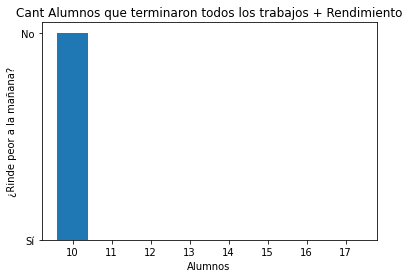

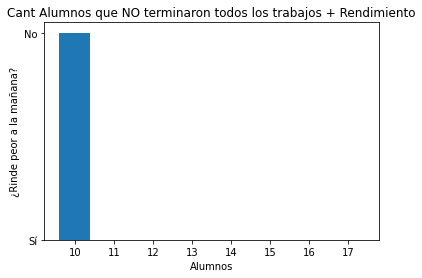

In [5]:
TTY = rtas['¿Pudo entregar todos los trabajos de la materia?']=='Sí'
TTN = rtas['¿Pudo entregar todos los trabajos de la materia?']=='No'

terminarTrabajosSi = TTY.value_counts().tolist()
terminarTrabajosNo = TTN.value_counts().tolist()
rendimiento = rtas["¿Consideras que tu rendimiento por la mañana es peor que por la tarde?"].unique()
plt.bar(terminarTrabajosSi,rendimiento)
plt.title('Cant Alumnos que terminaron todos los trabajos + Rendimiento')
plt.xlabel('Alumnos')
plt.ylabel('¿Rinde peor a la mañana?')
plt.show()

plt.bar(terminarTrabajosNo,rendimiento)
plt.title('Cant Alumnos que NO terminaron todos los trabajos + Rendimiento')
plt.xlabel('Alumnos')
plt.ylabel('¿Rinde peor a la mañana?')
plt.show()




- ¿Tendrá que ver con los contenidos?¿Cuántos consideran que analizar datos es aburrido?

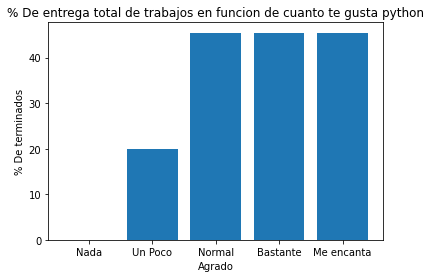

In [6]:
data = pd.read_csv("Analisis-taller-de-soporte-informático-_respuestas_.csv",sep=",",engine="python")
data.columns = [column.replace(" ", "_") for column in data.columns]
data.columns = [column.replace("?", "_") for column in data.columns]
data.columns = [column.replace("�", "_") for column in data.columns]
data.columns = [column.replace("¿", "_") for column in data.columns]

data['_Pudo_entregar_todos_los_trabajos_de_la_materia_'].replace(
    to_replace=['Sí', 'S�'],
    value='si',
    inplace=True
)

Resultados = []
Opciones = ["Nada", "Un Poco", "Normal", "Bastante", "Me encanta"]

dfPythonNada = data.query('_Cuánto_te_gusta_Python_como_lenguaje_de_programación_ == "Nada"')
Resultados.append((len(dfPythonNada.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "si"')) * 100) /  len(dfPythonNada))

dfPythonUnPoco = data.query('_Cuánto_te_gusta_Python_como_lenguaje_de_programación_ == "Un poco"')
Resultados.append((len(dfPythonUnPoco.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "si"')) * 100) /  len(dfPythonUnPoco))

dfPythonNormal = data.query('_Cuánto_te_gusta_Python_como_lenguaje_de_programación_ == "Normal"')
Resultados.append((len(dfPythonNormal.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "si"')) * 100) /  len(dfPythonNormal))


dfPythonBastante = data.query('_Cuánto_te_gusta_Python_como_lenguaje_de_programación_ == "Normal"')
Resultados.append((len(dfPythonBastante.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "si"')) * 100) /  len(dfPythonBastante))

dfPythonEncanta = data.query('_Cuánto_te_gusta_Python_como_lenguaje_de_programación_ == "Normal"')
Resultados.append((len(dfPythonEncanta.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "si"')) * 100) /  len(dfPythonEncanta))

plt.title('% De entrega total de trabajos en funcion de cuanto te gusta python')
plt.xlabel('Agrado')
plt.ylabel('% De terminados')
plt.bar(Opciones,Resultados)
plt.show()

- ¿Hasta qué mes del año se han entregado la mayoría los trabajos?


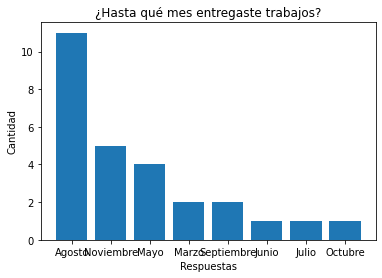

In [7]:
valoresX=rtas["¿Hasta qué mes entregaste trabajos?"].unique()
valoresY=rtas["¿Hasta qué mes entregaste trabajos?"].value_counts().tolist()

plt.bar(valoresX,valoresY)
plt.title('¿Hasta qué mes entregaste trabajos?')
plt.xlabel('Respuestas')
plt.ylabel('Cantidad')
plt.show()

##### Gracias a este gráfico podemos p

- ¿Cuáles son los trabajos correspondientes a ese mes?
